## Gradient Boosting - Hauptnutzfläche
Random Forest Model zur Schätzung der Hauptnutzfläche

### Datensatz
Imports & Datensatz laden

In [1]:
from sklearn.ensemble import GradientBoostingRegressor

import src.package.charts as charts
import src.package.importer as im
import src.package.ml_helper as ml_helper
import src.package.consts as c

# load dataset
df = im.get_extended_dataset('../package/datasets/train_set.csv')
X, y = ml_helper.ml_dataset_full(df)
# print(X.count())
# X, y = ml_helper.ml_dataset(df, upper_percentile='75%')
# X, y = ml_helper.ml_dataset(df, upper_percentile='50%')
# X, y = ml_helper.ml_dataset(df, upper_percentile='25%')

### Modell trainieren
Trainieren und testen des Models mit Repeated-Cross-Validation

In [2]:
regr = GradientBoostingRegressor(random_state=0)
scores = ml_helper.cross_validation(regr, X, y)


### Evaluieren
Auswertung des trainierten Models

In [3]:
ml_helper.evaluate_cv_scores(scores)

Evaluation
-------------------------
Fit time: 0.034962
Score time: 0.002463

[test_r2]
mean=0.920393 std=0.057252

[test_neg_mean_absolute_percentage_error]
mean=-0.193469 std=0.026361

[test_neg_root_mean_squared_error]
mean=-1120.590827 std=306.126951

[test_neg_mean_absolute_error]
mean=-538.331758 std=97.874544

[test_max_error]
mean=-5891.434141 std=2491.071648




### Features Importance
Wichtigkeit der Features für das Modell

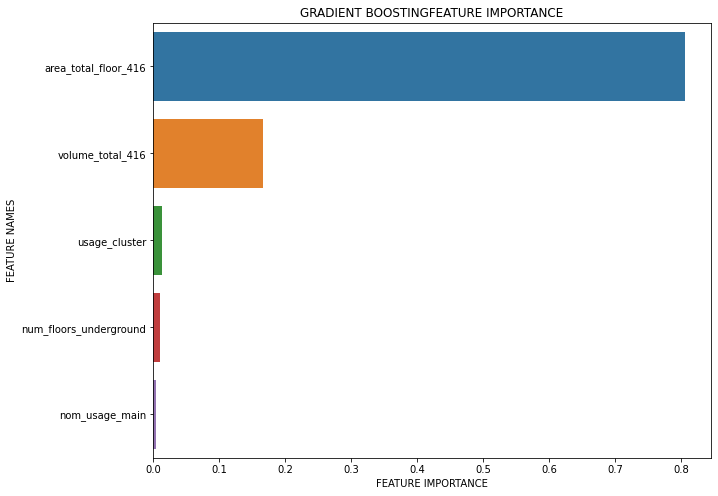

In [4]:
model = regr.fit(X, y)
charts.plot_feature_importance(model.feature_importances_, X.columns, 'GRADIENT BOOSTING')